Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за то, что прислал такую хорошую работу, видно, что приложено много услий!
* Проект достаточно аккуратный, хоть и можно было бы использовать побольше функций или циклов.
* Я оставил некоторые советы - надеюсь они будут интересны.
* Ты освоил технику бутстрап и применил ее корректно!
- В работе есть небольшие недочеты, но думаю ты легко с ними справишься.
- Жду твой обновленный проект.

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативные правки своей работы.
- Радует, что ты прислушиваешься к советам, проект стал выглядить намного лакончинее.
- В целом каждый шаг выглядит законченным, тема тобою изучена и тебе удалось достичь правильного результат - был выбран корректный регион.
- Поэтому я с радостью принимаю эту работу, и желаю удачи тебе в дальнейшем обучении.
- Продолжай в том же духе!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Цель: <a class = "tocSkip"> 
    
Определить регион, где наиболее целесообразно начать разработку нефтяных скважин.
    
## Задачи проекта: <a class = "tocSkip"> 
- подготовить данные к работе;
- построить модель на основе линейной регрессии (т.к. наиболее интерпретируемая)
- рассчитать основные финансовые показатели по каждому региону: минимальный объём запасов для безубыточной деятельности, фактические и прогнозные выручку, прибыль, рентабельность инвестиций.
- посчитать риски убытков для каждого региона
- применить бутстрап для определения 95% доверительного интервала
- провести анализ наиболее перспективного для разработки региона.

<div class="alert alert-block alert-success">
<b>Успех:</b> Спасибо за подробное описание проекта
</div>

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что собираешь все импорты  в начале проекта
</div>

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
data_0.info(), \
data_1.info(), \
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

(None, None, None)

In [4]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
data_0.columns

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

In [6]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Для анализа предоставлены данные по пробам нефти в трёх регионах. В каждом датафрейме имеется по 100 тысяч записей.

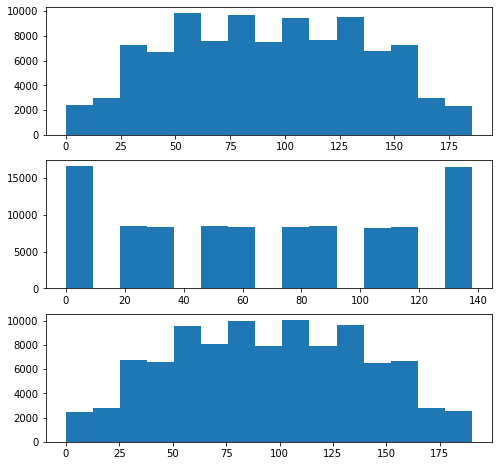

In [8]:
fig, ax = plt.subplots(nrows=3, figsize=(8,8))

ax[0].hist(data_0['product'], bins = 15)
ax[1].hist(data_1['product'], bins = 15)
ax[2].hist(data_2['product'], bins = 15)

plt.show()

In [9]:
data_1['product'].nunique()

12

Как видно из графиков по трём регионам, объёмы запасов в первом и третьем регионах имеет нормальное распределение, во втором регионе имеется всего несколько значений объёмов запасов, на которые приходятся все исследования, что может свидетельствовать о наличии ошибок при сборе данных во втором регионе, или, как в нашем случае, что данные синтетические.

In [10]:
data_0.duplicated().sum(), \
data_1.duplicated().sum()
data_2.duplicated().sum()

0

In [11]:
data_0.isna().sum(), \
data_1.isna().sum(), \
data_2.isna().sum()

(id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64,
 id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64,
 id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64)

Пропуски или дубликаты в исследуемых данных отсутствуют.

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка данных и первичный анализ сделаны корректно
</div>

## Обучение и проверка модели

Разделим все данные на обучающую и валидационную выборки. Обучим модели на основе линейной регрессии для каждого региона.

In [12]:
# features= data_0.drop(['id','product'], axis=1) 
# target= data_0['product']

# features_train_0, features_val_0, target_train_0, target_val_0 \
#     = train_test_split(features, target, test_size=0.25, random_state=1)
# features_train_0.shape, \
# features_val_0.shape

# features= data_1.drop(['id','product'], axis=1) 
# target= data_1['product']

# features_train_1, features_val_1, target_train_1, target_val_1 \
#     = train_test_split(features, target, test_size=0.25, random_state=1)
# features_train_1.shape, \
# features_val_1.shape

# features= data_2.drop(['id','product'], axis=1) 
# target= data_2['product']

# features_train_2, features_val_2, target_train_2, target_val_2 \
#     = train_test_split(features, target, test_size=0.25, random_state=1)
# features_train_2.shape, \
# features_val_2.shape

In [13]:
# функция для сплита датафрэймов и обучения моделей
def func(data):
    # разделим датафрейм на обучающую и валидационную выборки
    features = data.drop(['id','product'], axis=1) 
    target= data['product']
    features_train, features_val, target_train, target_val = train_test_split(features, target, test_size=0.25, random_state=1)
    # масштабируем имеющиеся данные 
    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_val[numeric]= scaler.transform(features_val[numeric])
    # обучим модель
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted = model.predict(features_val)
    predicted_mean = predicted.mean()
    rmse = mean_squared_error(target_val, predicted)**0.5
    return features_train, features_val, target_train, target_val, predicted, predicted_mean, rmse

In [14]:
features_train_0, features_val_0, target_train_0,target_val_0, \
predicted_0, predicted_mean_0, rmse_0 = func(data_0)
print("Среднее значение фактических объемов запасов в первом регионе на валидационной выборке:",
      round(target_val_0.mean(), 2), "тыс. баррелей.")
print("Среднее значение предсказанных объемов запасов в первом регионе:",
      round(predicted_mean_0, 2), "тыс. баррелей.")
print("RMSE на валидационной выборке по первому региону",  round(rmse_0, 2), "тыс. баррелей.")

Среднее значение фактических объемов запасов в первом регионе на валидационной выборке: 92.42 тыс. баррелей.
Среднее значение предсказанных объемов запасов в первом регионе: 92.49 тыс. баррелей.
RMSE на валидационной выборке по первому региону 37.74 тыс. баррелей.


In [15]:
features_train_1, features_val_1, target_train_1,target_val_1, \
predicted_1, predicted_mean_1, rmse_1 = func(data_1)
print("Среднее значение фактических запасов во втором регионе на валидационной выборке:",
      round(target_val_1.mean(), 2), "тыс. баррелей.")
print("Среднее значение предсказанных запасов во втором регионе:",
      round(predicted_mean_1, 2), "тыс. баррелей.")
print("RMSE на валидационной выборке по второму региону",  round(rmse_1, 2), "тыс. баррелей.")

Среднее значение фактических запасов во втором регионе на валидационной выборке: 69.12 тыс. баррелей.
Среднее значение предсказанных запасов во втором регионе: 69.12 тыс. баррелей.
RMSE на валидационной выборке по второму региону 0.89 тыс. баррелей.


In [16]:
features_train_2, features_val_2, target_train_2,target_val_2, \
predicted_2, predicted_mean_2, rmse_2 = func(data_2)
print("Среднее значение фактических запасов в третьем регионе на валидационной выборке:",
      round(target_val_2.mean(), 2), "тыс. баррелей.")
print("Среднее значение предсказанных запасов в третьем регионе:",
      round(predicted_mean_2, 2), "тыс. баррелей.")
print("RMSE на валидационной выборке по третьему региону",  round(rmse_2, 2), "тыс. баррелей.")

Среднее значение фактических запасов в третьем регионе на валидационной выборке: 95.25 тыс. баррелей.
Среднее значение предсказанных запасов в третьем регионе: 94.96 тыс. баррелей.
RMSE на валидационной выборке по третьему региону 39.87 тыс. баррелей.


In [17]:
# model_0 = LinearRegression()
# model_0.fit(features_train_0, target_train_0)
# predicted_0 = model_0.predict(features_val_0)
# predicted_0_mean = predicted_0.mean()
# rmse_0 = mean_squared_error(target_val_0, predicted_0)**0.5

# print("Среднее значение фактических объемов запасов в первом регионе на валидационной выборке:",
#       round(target_val_0.mean(), 2), "тыс. баррелей.")
# print("Среднее значение предсказанных объемов запасов в первом регионе:",
#       round(predicted_0_mean, 2), "тыс. баррелей.")
# print("RMSE на валидационной выборке по первому региону",  round(rmse_0, 2), "тыс. баррелей.")

# model_1 = LinearRegression()
# model_1.fit(features_train_1, target_train_1)
# predicted_1 = model_1.predict(features_val_1)
# predicted_1_mean = predicted_1.mean()
# rmse_1 = mean_squared_error(target_val_1, predicted_1)**0.5

# print("Среднее значение фактических объемов запасов во втором регионе на валидационной выборке:",
#       round(target_val_1.mean(), 2), "тыс. баррелей.")
# print("Среднее значение предсказанных объемов запасов во втором регионе:",
#       round(predicted_1_mean, 2), "тыс. баррелей.")
# print("RMSE на валидационной выборке по второму региону",  round(rmse_1, 2), "тыс. баррелей.")

# model_2 = LinearRegression()
# model_2.fit(features_train_2, target_train_2)
# predicted_2 = model_2.predict(features_val_2)
# predicted_2_mean = predicted_2.mean()
# rmse_2 = mean_squared_error(target_val_2, predicted_2)**0.5

# print("Среднее значение фактических объемов запасов в третьем регионе на валидационной выборке:",
#       round(target_val_2.mean(), 2), "тыс. баррелей.")
# print("Среднее значение предсказанных объемов запасов в третьем регионе:",
#       round(predicted_2_mean, 2), "тыс. баррелей.")
# print("RMSE на валидационной выборке по третьему региону",  round(rmse_2, 2), "тыс. баррелей.")

Применяя линейную регрессию, мы обучили модели для каждого из трёх регионов. Предсказанные средние значения объёмов запасов по каждому из регионов довольно близки к фактическим значениям на валидационных выборках, однако только в модели по второму региону получили среднее значение аналогичное целевому показателю. Наименьшее значение RMSE получилось у второй модели, для остальных регионов оно принимает довольно большие значения по сравнению со средними объёмам запасов реальных и предсказанных.

<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг сделан хорошо, все нужные метрики посчитаны.
</div>

<div class="alert alert-block alert-info">
<b>Совет:</b> Хорошо было бы использоват функции, чтобы избежать дублирования кода. 
</div>

<div class="alert alert-block alert-info">
<b>Совет:</b>  Линейные модели любят, когда данные масштабированы.
</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Cупер, стало намного лучше.
</div>

## Подготовка к расчёту прибыли

<div class="alert alert-block alert-info">
<b>Совет:</b>  Константы принято записывать в ВЕРХНЕМ РЕГИСТРЕ =)
</div>

In [18]:
# Зададим переменные для расчет финансовых показателей
BUDGET = 10000000000 # бюджет на разработку скважин
PRICE = 450000 # доход с каждой единицы продукта
OIL_WELL = 100000 # число скважин в регионе
BEP = BUDGET/PRICE/OIL_WELL # минимальное количество продукта в одной скважине, необходимое для безубыточной разработки


BEP, \
data_0['product'].mean(), \
data_1['product'].mean(), \
data_2['product'].mean()

(0.22222222222222224, 92.50000000000001, 68.82500000000002, 95.00000000000004)

In [19]:
(data_0.loc[:, 'product'] < BEP).sum(),\
(data_1.loc[:, 'product'] < BEP).sum(),\
(data_2.loc[:, 'product'] < BEP).sum()

(46, 8235, 53)

Для выхода на уровень безубыточности в скважине должно быть не менее 0,22 тыс. баррелей. Расчёт показал, что среднего запаса в каждом регионе достаточно для безубыточной разработки. При этом во 2-м регионе самое большое  число скважин имеют недостаточные запасы - 8.2%

<div class="alert alert-block alert-danger">
<b>Ошибка:</b>  Кажется ты забыл учесть количество скважин, при подсчете.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий:</b>  Честно говоря, это формулировка сбивает меня с толку. Надеюсь, в этот раз верно.
</div>

<div class="alert alert-block alert-info">
<b>Совет[2]:</b>  Практически, по условию задачи, выбрать нужно 200 скважин в регионе для бурения, поэтому значение будет немного другим, но из-за 1-го значения, не думаю, что стоит отправлять проект обратно, думаю ты и так поймешь это =)
</div>

In [20]:
# функция для расчета выручки
def revenue(target, prediction):
    prediction = pd.Series(prediction)
    target= target.reset_index(drop=True)
    predicted_200 = prediction.sort_values(ascending=False).head(200)
    selected = target.loc[predicted_200.index]
    print("Выручка фактическая для топ-200 скважин:", (selected.sum()*PRICE).round(2), "рублей")
    print("Выручка прогнозная для топ-200 скважин:", (predicted_200.sum()*PRICE).round(2), "рублей")
    print("Чистая прибыль фактическая:", (selected.sum()*PRICE- BUDGET).round(2), "рублей")
    print("Чистая прибыль прогнозная:", (predicted_200.sum()*PRICE-BUDGET).round(2), "рублей")
    print("Фактический ROI: {:.2%}".format((selected.sum()*PRICE -BUDGET)/BUDGET))
    print("Прогнозный ROI: {:.2%}".format((predicted_200.sum()*PRICE-BUDGET)/BUDGET))

<div class="alert alert-block alert-success">
<b>Успех:</b> Выручка считается верно
</div>

In [21]:
# Финансовые показатели по первому региону
revenue_0 = revenue(target_val_0, predicted_0)

Выручка фактическая для топ-200 скважин: 13260781417.81 рублей
Выручка прогнозная для топ-200 скважин: 13958088694.56 рублей
Чистая прибыль фактическая: 3260781417.81 рублей
Чистая прибыль прогнозная: 3958088694.56 рублей
Фактический ROI: 32.61%
Прогнозный ROI: 39.58%


In [22]:
# Финансовые показатели по второму региону
revenue_1 = revenue(target_val_1, predicted_1)

Выручка фактическая для топ-200 скважин: 12415086696.68 рублей
Выручка прогнозная для топ-200 скважин: 12491938386.62 рублей
Чистая прибыль фактическая: 2415086696.68 рублей
Чистая прибыль прогнозная: 2491938386.62 рублей
Фактический ROI: 24.15%
Прогнозный ROI: 24.92%


In [23]:
# Финансовые показатели по третьему региону
revenue_2 = revenue(target_val_2, predicted_2)

Выручка фактическая для топ-200 скважин: 12563093352.17 рублей
Выручка прогнозная для топ-200 скважин: 13391431467.34 рублей
Чистая прибыль фактическая: 2563093352.17 рублей
Чистая прибыль прогнозная: 3391431467.34 рублей
Фактический ROI: 25.63%
Прогнозный ROI: 33.91%


Потенциально наибольшую выручку способен принести первый регион, но это не даёт нам представления о возможных убытках и среднем значении прибыли.

## Расчёт прибыли и рисков 

In [24]:
def net_income(target, prediction, count):
    pred_sorted = pd.Series(prediction).sort_values(ascending=False)
    selected = target[pred_sorted.index][:count]
    return round(PRICE * selected.sum() - BUDGET,2)

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Кажется ты посчитал выручку и здесь. Прибыль = выручка - расходы.
</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Отлично
</div>

In [25]:
state = np.random.RandomState(1)

# функция для применения бутстрепа
def bootstrap(target, prediction):
    values = []
    for i in range(1000):
        target = target.reset_index(drop=True)
        prediction = pd.Series(prediction)
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        pred_subsample = prediction[target_subsample.index]
        values.append(net_income(target_subsample, pred_subsample, 200))
    values = pd.Series(values)
    return values

In [26]:
values = bootstrap(target_val_0, predicted_0)
lower = values.quantile(0.025).round(2)
upper = values.quantile(0.975).round(2)

print("Среднее значение прибыли: {:.2f} рублей".format(values.mean()))
print("95%-ый доверительный интервал для первого региона:", lower,"-",upper)
print("Риск убытков составляет: {:.2%}".format(values[values < 0].count()/len(values)))

Среднее значение прибыли: 464377670.36 рублей
95%-ый доверительный интервал для первого региона: -98453877.17 - 1007469099.05
Риск убытков составляет: 5.20%


In [27]:
values = bootstrap(target_val_1, predicted_1)
lower = values.quantile(0.025).round(2)
upper = values.quantile(0.975).round(2)

print("Среднее значение прибыли: {:.2f} рублей".format(values.mean()))
print("95%-ый доверительный интервал для первого региона:", lower,"-",upper)
print("Риск убытков составляет: {:.2%}".format(values[values < 0].count()/len(values)))

Среднее значение прибыли: 541636803.39 рублей
95%-ый доверительный интервал для первого региона: 125207614.26 - 960960337.36
Риск убытков составляет: 0.40%


In [28]:
values = bootstrap(target_val_2, predicted_2)
lower = values.quantile(0.025).round(2)
upper = values.quantile(0.975).round(2)

print("Среднее значение прибыли: {:.2f} рублей".format(values.mean()))
print("95%-ый доверительный интервал для первого региона:", lower,"-",upper)
print("Риск убытков составляет: {:.2%}".format(values[values < 0].count()/len(values)))

Среднее значение прибыли: 420170371.35 рублей
95%-ый доверительный интервал для первого региона: -109597815.0 - 991155649.43
Риск убытков составляет: 6.70%


In [29]:
# values = []
# for i in range(1000):
#     target = target_val_0.reset_index(drop=True)
#     prediction = pd.Series(predicted_0)
#     target_subsample = target.sample(n=500, replace=True, random_state=state)
#     pred_subsample = prediction[target_subsample.index]
#     values.append(net_income(target_subsample, pred_subsample, 200))
# values = pd.Series(values)
# lower = values.quantile(0.025).round(2)
# upper = values.quantile(0.975).round(2)

# print("Среднее значение прибыли: {:.2f} рублей".format(values.mean()))
# print("95%-ый доверительный интервал для первого региона:", lower,"-",upper)
# print("Риск убытков составляет: {:.2%}".format(values[values < 0].count()/len(values)))

# values = []
# for i in range(1000):
#     target = target_val_1.reset_index(drop=True)
#     prediction = pd.Series(predicted_1)
#     target_subsample = target.sample(n=500, replace=True, random_state=state)
#     pred_subsample = prediction[target_subsample.index]
#     values.append(net_income(target_subsample, pred_subsample, 200))
# values = pd.Series(values)
# lower = values.quantile(0.025).round(2)
# upper = values.quantile(0.975).round(2)
    
# print("Среднее значение прибыли: {:.2f} рублей".format(values.mean()))
# print("95%-ый доверительный интервал для первого региона:", lower,"-",upper)
# print("Риск убытков составляет: {:.2%}".format(values[values < 0].count()/len(values)))

# values = []
# for i in range(1000):
#     target = target_val_2.reset_index(drop=True)
#     prediction = pd.Series(predicted_2)
#     target_subsample = target.sample(n=500, replace=True, random_state=state)
#     pred_subsample = prediction[target_subsample.index]
#     values.append(net_income(target_subsample, pred_subsample, 200))
# values = pd.Series(values)
# lower = values.quantile(0.025).round(2)
# upper = values.quantile(0.975).round(2)
    
# print("Среднее значение прибыли: {:.2f} рублей".format(values.mean()))
# print("95%-ый доверительный интервал для первого региона:", lower,"-",upper)
# print("Риск убытков составляет: {:.2%}".format(values[values < 0].count()/len(values)))

<div class="alert alert-block alert-success">
<b>Успех:</b> Бутстрап применен корректно, риски считаются вреным образом.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> С дов. интервалом тоже все в порядке, но его нужно считать для значений прибыли, а не выручки.
</div>

<div class="alert alert-block alert-info">
<b>Совет:</b> Здесь тоже можно было бы избежать дублирования кода.
</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Замечательное использование функции =) Все значения посчитаны корректно, и регион выбран правильный.
</div>

В результате проведения бутстрепа выяснили, что наилучшим для освоения будет второй регион (geo_data_1): он демонстрирует наибольшую среднюю прибыль - 541.64 млн. руб. С 95% вероятностью прибыль будет находится в диапазоне 125.207 - 960.96 млн.руб. Риски понести убытки при разработке в этом регионе также самые низкие.

<div class="alert alert-block alert-success">
<b>Успех:</b> Всегда приятно наблюдать итоговый вывод в конце работы, обнови его если потребуется.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован